In [2]:
# Package import
import math

if __name__ == "__main__":
    
    # Initialization
    data_file_name = 'DecTreeAssign1.dat'
    output_file_name = 'first_split_info.dat'
    data_mat = [] # data matrix
    max_value = [] # a list of maximum value for each feature
    min_value = [] # a list of minimum value for each feature
    mean = [] # a list of mean value for each feature after scaling
    first_item = True
    second_item = True
    
    # Open the file as data_file_ptr
    with open(data_file_name, 'r') as data_file_ptr:
        # For every line in the file
        for in_item in data_file_ptr:
            in_item = in_item.strip()
            in_item_list = in_item.split(',') # split to list using "," as seperator
            
            # Save the max and min values for each feature
            if not first_item:
                # Second row will automatically be the max and min for now
                if second_item: 
                    for i in range(1, len(in_item_list)):
                        in_item_list[i] = float(in_item_list[i])
                        max_value.append(in_item_list[i])
                        min_value.append(in_item_list[i])
                        second_item = False
                # For the other rows, compare and fit in the max and min
                else:
                    for i in range(1, len(in_item_list)):
                        in_item_list[i] = float(in_item_list[i])
                        if in_item_list[i] > max_value[i-1]:
                            max_value[i-1] = in_item_list[i]
                        if in_item_list[i] < min_value[i-1]:
                            min_value[i-1] = in_item_list[i]
            first_item = False
            data_mat.append(in_item_list)
        data_file_ptr.close()

    # Scale each attributes
    for row in range(1, len(data_mat)):
        for col in range(1, len(data_mat[0])):
            data_mat[row][col] = (data_mat[row][col] - min_value[col-1]) / abs(max_value[col-1] - min_value[col-1])
            
    # Calculate the mean value for each feature
    mean = data_mat[1][1:]
    for row in range(2, len(data_mat)): # add all remaining row values to the previous row
        mean = [(mean[col-1] + data_mat[row][col]) for col in range(1, len(data_mat[0]))]
    mean = [(mean[i] / (len(data_mat) - 1)) for i in range(len(mean))] # divide by number of rows to get the mean
    
    # Calculate root node information
    B_obs = 0
    M_obs = 0
    # divide every data instance into class "B" or class "M"
    for row in range(1, len(data_mat)):
        if data_mat[row][0] == 'B':
            B_obs += 1
        else:
            M_obs += 1
    total_obs = B_obs + M_obs
    root_gini = 1 - ((B_obs / total_obs) ** 2 + (M_obs / total_obs) ** 2)
    root_entropy = - ((B_obs / total_obs) * math.log2((B_obs / total_obs)) 
                  + (M_obs / total_obs) * math.log2((M_obs / total_obs)))
    print('Root Node:')
    print('Class B observations: ' + str(B_obs))
    print('Class M observations: ' + str(B_obs))
    print('Total observations: ' + str(total_obs))
    print('Root gini: ' + str(round(root_gini, 4)))
    print('Root entropy: ' + str(round(root_entropy, 4)))
    print('\n')
    
    # Calculate first split information
    info_output = []
    for feature in range(1, len(data_mat[0])): # iterate through all possible features to find the best split
        child1_B = 0 # number of "B" class observations in class 1
        child1_M = 0 # number of "M" class observations in class 1
        child1_total = 0 # number of total observations in class 1
        child2_B = 0 # number of "B" class observations in class 2
        child2_M = 0 # number of "M" class observations in class 2
        child2_total = 0 # number of total observations in class 2
        current_split = []
        for row in range(1, len(data_mat)):
            if data_mat[row][feature] < mean[feature-1]: # mean[feature-1] is the threshold for splitting
                if data_mat[row][0] == 'B':
                    child1_B += 1
                else:
                    child1_M += 1
            else:
                if data_mat[row][0] == 'B':
                    child2_B += 1
                else:
                    child2_M += 1
        # Then calculate the related split information
        child1_total = child1_B + child1_M
        child1_gini = 1 - ((child1_B / child1_total) ** 2 + (child1_M / child1_total) ** 2)
        child1_entropy = - ((child1_B / child1_total) * math.log2((child1_B / child1_total)) 
                  + (child1_M / child1_total) * math.log2(child1_M / child1_total))
        child2_total = child2_B + child2_M
        child2_gini = 1 - ((child2_B / child2_total) ** 2 + (child2_M / child2_total) ** 2)
        child2_entropy = - ((child2_B / child2_total) * math.log2((child2_B / child2_total)) 
                            + (child2_M / child2_total) * math.log2(child2_M / child2_total))
        gini_combined = (child1_total * child1_gini / (child1_total + child2_total)) + (child2_total * child2_gini / (child1_total + child2_total))
        entropy_combined = (child1_total * child1_entropy / (child1_total + child2_total)) + (child2_total * child2_entropy / (child1_total + child2_total))
        
        # Append all split information to current_split and later output to the output file for comparison
        current_split.append(data_mat[0][feature])
        current_split.append(round(mean[feature-1], 4))
        current_split.append(child1_B)
        current_split.append(child1_M)
        current_split.append(round(child1_gini, 4))
        current_split.append(round(child1_entropy, 4))
        current_split.append(child2_B)
        current_split.append(child2_M)
        current_split.append(round(child2_gini, 4))
        current_split.append(round(child2_entropy, 4))
        current_split.append(round(gini_combined, 4))
        current_split.append(round(entropy_combined, 4))
        info_output.append(current_split)
        
    # Output first split information for all feature
    with open(output_file_name, 'w') as f: 
        for row in range(len(info_output)):
            l = str(info_output[row][0])
            for col in range(1, len(info_output[0])):
                l = l + ', ' + str(info_output[row][col])
            l = l + '\n'
            f.write(l)
        f.close()
    print('First split info successfully stored in file: ' + output_file_name)

Root Node:
Class B observations: 357
Class M observations: 357
Total observations: 569
Root gini: 0.4675
Root entropy: 0.9526


First split info successfully stored in file: first_split_info.dat


Based on the results shown in the DecTreeAssign1_out.csv file, the first split should be on:
1. Feature F23 if based on gini index. The gini index of F23 is 0.1476.
2. Also feature F23 if based on entropy. The entropy of F23 is 0.4.
Therefore, F23 should be chosen to split the root node. The same feature is chosen when using both criteria. 
The output information can be found in file "first_split_info.dat".

In [4]:
# Exploration of other aspects of my program

Text(0.5, 1.0, 'Class distribution in the root node')

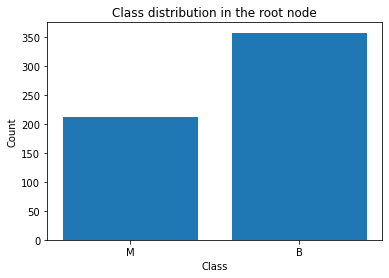

In [66]:
# Class distribution using barplot
import matplotlib.pyplot as plt

class_col = [data_mat[i][0] for i in range(1, len(data_mat))]
class_count = [class_col.count("M"), class_col.count("B")]
fig, ax1 = plt.subplots()
ax1.bar(["M", "B"], class_count)
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_title('Class distribution in the root node')

Text(0.5, 1.0, 'Class distribution of Child2')

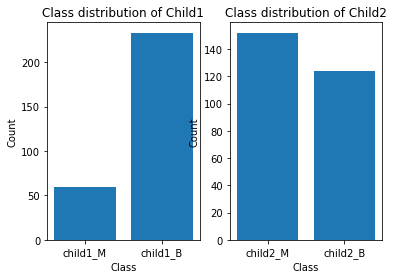

In [68]:
# Class distribution in child1 and child2 for the best split at F23
child1_B = 0
child1_M = 0
child1_total = 0
child2_B = 0
child2_M = 0
child2_total = 0
current_split = []
for row in range(1, len(data_mat)):
    if data_mat[row][25] < mean[25-1]:
        if data_mat[row][0] == 'B':
            child1_B += 1
        else:
            child1_M += 1
    else:
        if data_mat[row][0] == 'B':
            child2_B += 1
        else:
            child2_M += 1
child1_total = child1_B + child1_M
child1_gini = 1 - ((child1_B / child1_total) ** 2 + (child1_M / child1_total) ** 2)
child1_entropy = - ((child1_B / child1_total) * math.log2((child1_B / child1_total)) 
                    + (child1_M / child1_total) * math.log2(child1_M / child1_total))
child2_total = child2_B + child2_M
child2_gini = 1 - ((child2_B / child2_total) ** 2 + (child2_M / child2_total) ** 2)
child2_entropy = - ((child2_B / child2_total) * math.log2((child2_B / child2_total)) 
                    + (child2_M / child2_total) * math.log2(child2_M / child2_total))
gini_combined = (child1_total * child1_gini / (child1_total + child2_total)) + (child2_total * child2_gini / (child1_total + child2_total))
entropy_combined = (child1_total * child1_entropy / (child1_total + child2_total)) + (child2_total * child2_entropy / (child1_total + child2_total))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(["child1_M", "child1_B"], [child1_M, child1_B])
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_title('Class distribution of Child1')
ax2.bar(["child2_M", "child2_B"], [child2_M, child2_B])
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.set_title('Class distribution of Child2')

[Text(200.88000000000002, 181.2, 'X[0] <= 2.5\ngini = 0.595\nsamples = 891\nvalue = [216, 184, 491]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 1.5\ngini = 0.497\nsamples = 400\nvalue = [216, 184, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 216\nvalue = [216, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 184\nvalue = [0, 184, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 491\nvalue = [0, 0, 491]')]

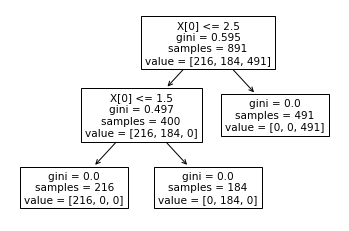

[Text(200.88000000000002, 181.2, 'X[0] <= 2.5\ngini = 0.595\nsamples = 891\nvalue = [216, 184, 491]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 1.5\ngini = 0.497\nsamples = 400\nvalue = [216, 184, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 216\nvalue = [216, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 184\nvalue = [0, 184, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 491\nvalue = [0, 0, 491]')]

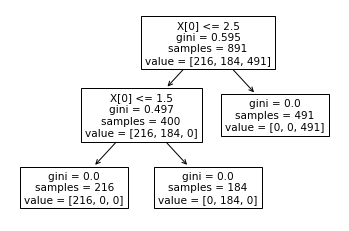